# Cohort Analysis

## Introduction

<div class="alert alert-block alert-danger">
<b>What is it?</b> 
<ul>
    <li>Behavioural Analytics</li>
    <li>Splits users into related groups (Cohorts)</li>
    <li>Cohorts, usually share common characteristics or experiences within a defined time-span.</li>
     <li>Allows a company to “see patterns clearly across the life-cycle of a customer (or user), rather than slicing across all customers blindly without accounting for the natural cycle that a customer undergoes</li>
    <li>compare metrics across PRODUCT lifecycle</li>
    <li>compare metrics across CUSTOMER lifecycle</li>
</ul>
</div>

<div class="alert alert-block alert-danger">
<b>Types of Cohorts</b> 
<ul>
    <li>TIME Cohorts (Customers that signed up for a product during a particular time frame)</li>
    <li>BEHAVIOUR Cohorts (Customers that signed up on the type of product/subscription)</li>
    <li>SIZE Cohorts (Amount of Spending in some period after accusition/ product type that cusomers spend most of order amount  )</li>
</ul>
</div>

<b> Data fro Cohort Analysis:: </b>

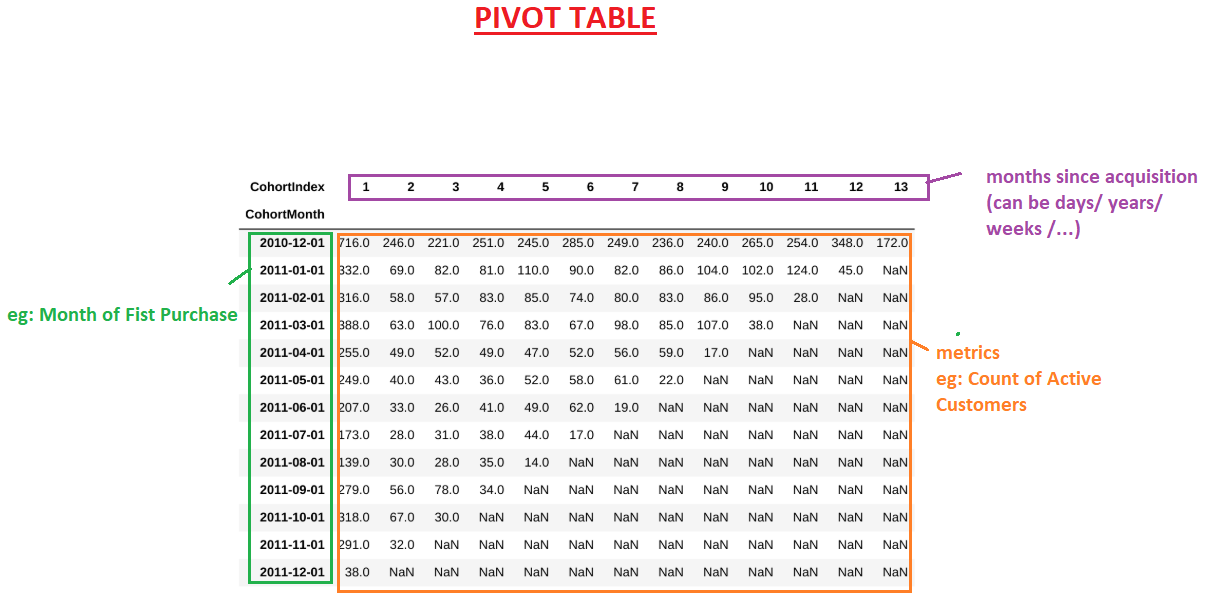

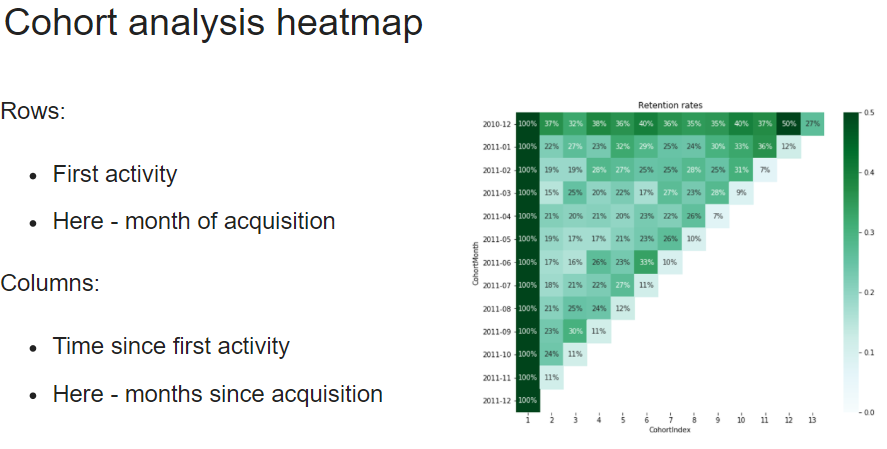

## Time Cohorts

### Creating Cohort Table

In [251]:
import pandas as pd
import datetime as dt

In [252]:
online = pd.read_csv('datasets/C1/online.csv')
online = online[['InvoiceDate','CustomerID', 'Quantity', 'UnitPrice' , 'InvoiceNo']]
online['InvoiceDate'] =  pd.to_datetime(online['InvoiceDate'])
online.head(2)

,InvoiceDate,CustomerID,Quantity,UnitPrice,InvoiceNo
0,2011-10-25 08:26:00,14286,6,2.10,572558
1,2011-11-20 11:56:00,16360,1,1.45,577485


In [253]:
def get_month(x): 
    """Get the Frist day of the month from a date object"""
    return dt.datetime(x.year, x.month, 1) 

# Create InvoiceDay column
online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month) 

online.head(2)

,InvoiceDate,CustomerID,Quantity,UnitPrice,InvoiceNo,InvoiceMonth
0,2011-10-25 08:26:00,14286,6,2.10,572558,2011-10-01
1,2011-11-20 11:56:00,16360,1,1.45,577485,2011-11-01


In [254]:
# Group by CustomerID and select the InvoiceMonth value
grouping = online.groupby('CustomerID')['InvoiceMonth'] 

# Assign a minimum InvoiceDay value to the dataset
online['CohortMonth'] = grouping.transform('min')       #First Purchase Month of each customer

online.head(2)

,InvoiceDate,CustomerID,Quantity,UnitPrice,InvoiceNo,InvoiceMonth,CohortMonth
0,2011-10-25 08:26:00,14286,6,2.10,572558,2011-10-01,2011-04-01
1,2011-11-20 11:56:00,16360,1,1.45,577485,2011-11-01,2011-09-01


In [255]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [256]:
# Get the integers for date parts from the InvoiceDaycolumn
invoice_year, invoice_month, invoice_day = get_date_int(online, 'InvoiceMonth')

# Get the integers for date parts from the CohortDay column
cohort_year, cohort_month, cohort_day = get_date_int(online, 'CohortMonth')

-  calculate the difference between the Invoice and Cohort dates in years, months and days separately and then calculate the total days difference between the two. :

In [257]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Calculate difference in days
#days_diff = invoice_day - cohort_day

#DAYS FROM FIRST PURCHASE::
# Extract the difference in months from all previous values
online['CohortIndex'] = years_diff * 12 + months_diff + 1  
## +1 SO THAT FIRST COHORT IS MARKED AS 1 (not 0)

online.head(2)

,InvoiceDate,CustomerID,Quantity,UnitPrice,InvoiceNo,InvoiceMonth,CohortMonth,CohortIndex
0,2011-10-25 08:26:00,14286,6,2.10,572558,2011-10-01,2011-04-01,7
1,2011-11-20 11:56:00,16360,1,1.45,577485,2011-11-01,2011-09-01,3


<p style="border-radius: 30px;
          border:2px; 
          border-style:solid; 
          border-color:#000000;
          padding: 2em;
          box-shadow: 5px 10px;
          text-align: justify;
          background-color:lightgreen;">
<b>Number of Monthly Customers in Each Cohort:</b> 

</p>

In [258]:
online.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].apply(pd.Series.nunique)

CohortMonth  CohortIndex
2010-12-01   1              716
             2              246
             3              221
             4              251
             5              245
                           ... 
2011-10-01   2               67
             3               30
2011-11-01   1              291
             2               32
2011-12-01   1               38
Name: CustomerID, Length: 91, dtype: int64

In [259]:
grouping = online.groupby(['CohortMonth', 'CohortIndex'])

# Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
#reset index
cohort_data =cohort_data.reset_index()

# Create a pivot 
cohort_counts = cohort_data.pivot(index='CohortMonth', 
                                  columns='CohortIndex', 
                                  values='CustomerID')  #customer counts as values

In [260]:
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
2011-05-01,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-danger">
<b>Cohort Metrics</b> 
<ul>
    <li>Retention Rate</li>
    <li>Averate Quantity of PUrchase for each cohort </li>
    <li>Averate Price of PUrchase for each cohort </li>
</ul>
</div>

<p style="border-radius: 30px;
          border:2px; 
          border-style:solid; 
          border-color:#000000;
          padding: 2em;
          box-shadow: 5px 10px;
          text-align: justify;
          background-color:lightgreen;">
<b>Calculating Retention Rate ::</b> 

</p>

- Retention gives you the percentage of active customers compared to the total number of customers over time

In [261]:
cohort_sizes = cohort_counts.iloc[:,0] #Fisrt colum of customer counts cohort

retention = cohort_counts.divide(cohort_sizes, axis = 0) #divide along row axis


retention = retention.round(3) * 100 #Percentage

retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,34.4,30.9,35.1,34.2,39.8,34.8,33.0,33.5,37.0,35.5,48.6,24.0
2011-01-01,100.0,20.8,24.7,24.4,33.1,27.1,24.7,25.9,31.3,30.7,37.3,13.6,NaN
2011-02-01,100.0,18.4,18.0,26.3,26.9,23.4,25.3,26.3,27.2,30.1,8.9,NaN,NaN
2011-03-01,100.0,16.2,25.8,19.6,21.4,17.3,25.3,21.9,27.6,9.8,NaN,NaN,NaN
2011-04-01,100.0,19.2,20.4,19.2,18.4,20.4,22.0,23.1,6.7,NaN,NaN,NaN,NaN
2011-05-01,100.0,16.1,17.3,14.5,20.9,23.3,24.5,8.8,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,15.9,12.6,19.8,23.7,30.0,9.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,16.2,17.9,22.0,25.4,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,21.6,20.1,25.2,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<p style="border-radius: 30px;
          border:2px; 
          border-style:solid; 
          border-color:#000000;
          padding: 2em;
          box-shadow: 5px 10px;
          text-align: justify;
          background-color:lightgreen;">
<b>Average Quantity of Purchases for each cohort ::</b> 

</p>

In [262]:
grouping = online.groupby(['CohortMonth', 'CohortIndex'])

cohort_data = grouping['Quantity'].mean()

cohort_data =cohort_data.reset_index()


average_quantity = cohort_data.pivot(index='CohortMonth', 
                                  columns='CohortIndex', 
                                  values='Quantity')  #customer counts as values

average_quantity = average_quantity.round(1) 

average_quantity

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.1,12.3,12.2,13.2,13.7,11.3,10.6,12.8,13.2,13.0,14.5,10.9,13.7
2011-01-01,10.9,10.8,10.0,10.1,14.3,13.2,17.4,16.4,18.7,10.2,10.7,13.2,NaN
2011-02-01,12.1,14.3,10.6,11.5,17.5,12.2,17.3,13.2,13.4,15.9,14.3,NaN,NaN
2011-03-01,9.6,14.2,13.0,10.2,16.1,12.7,11.6,11.5,9.0,9.6,NaN,NaN,NaN
2011-04-01,9.9,11.1,12.4,11.5,11.4,7.7,10.4,9.4,6.6,NaN,NaN,NaN,NaN
2011-05-01,14.1,9.6,15.3,11.6,11.9,8.5,9.8,7.3,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.6,16.1,18.1,11.2,12.4,7.2,9.7,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,10.9,16.4,5.6,10.1,6.2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.5,7.4,5.5,5.7,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<p style="border-radius: 30px;
          border:2px; 
          border-style:solid; 
          border-color:#000000;
          padding: 2em;
          box-shadow: 5px 10px;
          text-align: justify;
          background-color:lightgreen;">
<b>Average Price of Purchases for each cohort ::</b> 

</p>

In [263]:
grouping = online.groupby(['CohortMonth', 'CohortIndex'])

cohort_data = grouping['UnitPrice'].mean()

cohort_data =cohort_data.reset_index()


average_price = cohort_data.pivot(index='CohortMonth', 
                                  columns='CohortIndex', 
                                  values='UnitPrice')  #customer counts as values

average_price = average_price.round(1) 

average_price

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,3.0,3.0,3.0,2.8,2.7,6.9,2.8,3.0,2.7,2.7,3.0,2.8,2.6
2011-01-01,3.2,3.1,3.0,3.0,3.1,3.0,3.0,2.5,2.7,2.9,2.6,2.0,NaN
2011-02-01,3.1,4.0,3.3,2.9,3.3,2.9,2.8,2.7,2.9,2.7,3.1,NaN,NaN
2011-03-01,3.5,3.6,3.5,2.8,2.7,2.5,2.7,2.9,2.5,2.4,NaN,NaN,NaN
2011-04-01,3.3,4.4,3.4,2.6,2.8,2.8,2.8,2.6,2.6,NaN,NaN,NaN,NaN
2011-05-01,3.1,2.8,2.5,2.7,2.5,2.3,2.7,2.3,NaN,NaN,NaN,NaN,NaN
2011-06-01,2.8,2.4,2.7,3.1,2.5,2.4,2.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,3.2,3.1,3.4,2.5,2.4,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,2.9,3.7,5.4,6.9,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Vizualizing Cohort Analysis

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt

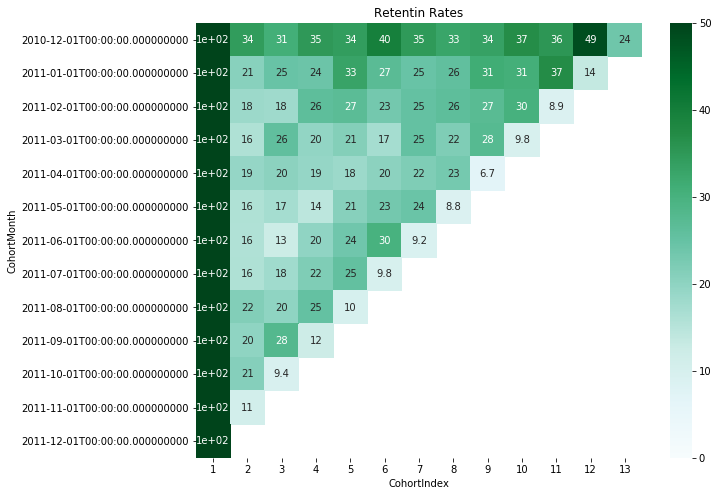

In [265]:
plt.figure(figsize = (10,8))
plt.title('Retentin Rates')

sns.heatmap(data = retention,
           annot = True,
           #fmt = '.0%',
           vmin= 0,  #to prevent outlier effects
           vmax= 50,
           cmap = 'BuGn')

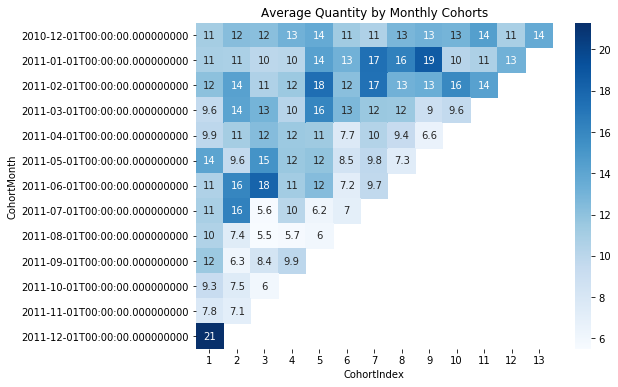

In [266]:
plt.figure(figsize=(8, 6))
plt.title('Average Quantity by Monthly Cohorts')
sns.heatmap(average_quantity, annot=True, cmap='Blues')

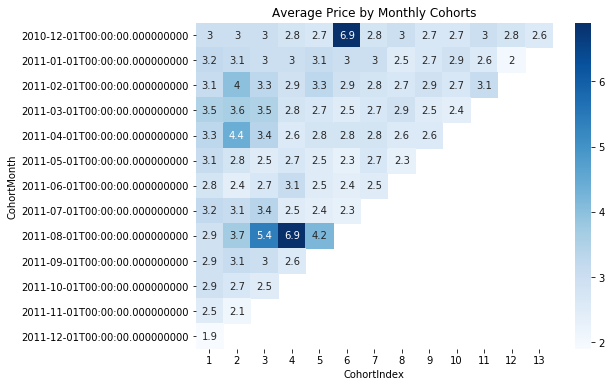

In [267]:
plt.figure(figsize=(8, 6))
plt.title('Average Price by Monthly Cohorts')
sns.heatmap(average_price, annot=True, cmap='Blues')

# Recency, Frequency, Monetary (RFM) segmentation


## Theory

<div class="alert alert-block alert-danger">
<b>Behavioral Customer Segmentation Based on :</b> 
<ul>
    <li>Recency :: How Recent was each customers last purchase?</li>
    <li>Frequency :: How machy purchases the customer has done for the last 12 months?</li>
    <li>Monetary ::How machythe customer has spent for the last 12 months?</li>
</ul>
</div>

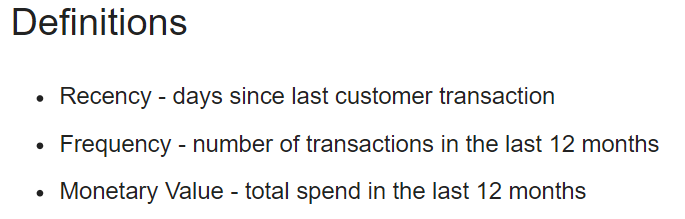

<div class="alert alert-block alert-danger">
<b>Grouping RFM Values ::: Different Methods:: </b> 
<ul>
    <li>Percentiles (Quantiles)</li>
    <li>Pareto (80/20) cut</li>
    <li>Custom (thresholds based on business knowledge)</li>
</ul>
</div>

<p style="border-radius: 30px;
          border:2px; 
          border-style:solid; 
          border-color:#000000;
          padding: 2em;
          box-shadow: 5px 10px;
          text-align: justify;
          background-color:lightgreen;">
<b>Based on Percentiles:</b> 

</p>

In [268]:
df = pd.DataFrame.from_dict({'CustomerID' : np.array([0,1,2,3,4,5,6,7]) , 'Spending' : np.array([137 , 335, 172, 355, 303, 233, 244, 229])})
df

,CustomerID,Spending
0,0,137
1,1,335
2,2,172
3,3,355
4,4,303
5,5,233
6,6,244
7,7,229


<div class="alert alert-block alert-danger">
<b>PANDAS .qcut method:</b> <br>
    Quantile-based discretization function.
<br>
Discretize variable into equal-sized buckets based on rank or based on sample quantiles. For example 1000 values for 10 quantiles would produce a Categorical object indicating quantile membership for each data point.
</ul>
</div>

``` python
pd.qcut( df['col'] , q = # of equal sized groups (quartiles) , labels = #Unique Labels )
```

<b> q::: </b> :Number of quantiles. 10 for deciles, 4 for quartiles, etc. Alternately array of quantiles, e.g. [0, .25, .5, .75, 1.] for quartiles.

In [269]:
spend_quartiles = pd.qcut(df['Spending'] , 
                            q=4,
                            labels = range(1,5) )
df['Spend_Quartile'] = spend_quartiles

df.sort_values('Spending')

,CustomerID,Spending,Spend_Quartile
0,0,137,1
2,2,172,1
7,7,229,2
5,5,233,2
6,6,244,3
4,4,303,3
1,1,335,4
3,3,355,4


In [270]:
df = pd.DataFrame.from_dict({'CustomerID' : np.array([0,1,2,3,4,5,6,7]) , 'Recency_days' : np.array([37 ,235, 396, 72, 255, 393, 203, 133])})
df

,CustomerID,Recency_days
0,0,37
1,1,235
2,2,396
3,3,72
4,4,255
5,5,393
6,6,203
7,7,133


<b> NOTE </b> : The more recent the customer, the better

In [271]:
r_label = list(range(4,0,-1))
r_label

[4, 3, 2, 1]

In [272]:
recency_quartiles = pd.qcut(df['Recency_days'] , 
                            q=4,
                            labels = r_label )
df['Recency_Quartile'] = recency_quartiles

df.sort_values('Recency_days')

,CustomerID,Recency_days,Recency_Quartile
0,0,37,4
3,3,72,4
7,7,133,3
6,6,203,3
1,1,235,2
4,4,255,2
5,5,393,1
2,2,396,1


<div class="alert alert-block alert-danger">
<b>Custom Labels</b> 
</ul>
</div>

In [273]:
r_label = ['Active' , 'Lapsed' ,'Inactive' , 'Churned']

recency_quartiles = pd.qcut(df['Recency_days'] , 
                            q=4,
                            labels = r_label )
df['Recency_Quartile'] = recency_quartiles

df.sort_values('Recency_days')

,CustomerID,Recency_days,Recency_Quartile
0,0,37,Active
3,3,72,Active
7,7,133,Lapsed
6,6,203,Lapsed
1,1,235,Inactive
4,4,255,Inactive
5,5,393,Churned
2,2,396,Churned


## RFM Metrics

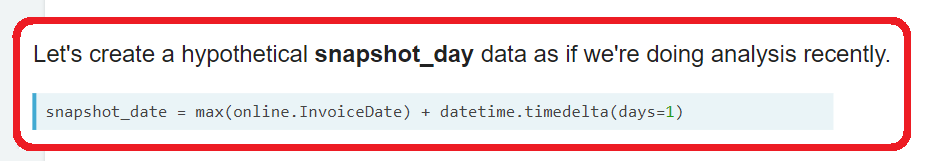

- In real life data analysis , it shoud be <b> TODAY </b>

In [353]:
import datetime
snapshot_date = max(online.InvoiceDate) + datetime.timedelta(days = 1)

In [354]:
online.head(2)

,InvoiceDate,CustomerID,Quantity,UnitPrice,InvoiceNo,InvoiceMonth,CohortMonth,CohortIndex,TotalSum
0,2011-10-25 08:26:00,14286,6,2.10,572558,2011-10-01,2011-04-01,7,12.60
1,2011-11-20 11:56:00,16360,1,1.45,577485,2011-11-01,2011-09-01,3,1.45


In [355]:
online['TotalSum'] = online['Quantity'] * online['UnitPrice']

In [359]:
#Aggregate data on customer level

datamart = online.groupby(['CustomerID']).agg({
                      #Number of days b/w Hypothetical today & the last transaction
                        'InvoiceDate' : lambda x: (snapshot_date - x.max()).days,
                      #Total Number of Purcahses
                        'InvoiceNo'   : 'count',
                      #Total Spendings
                        'TotalSum'    : 'sum'
    
                                           })

- :TENURE : Time since first transaction(How long the customer has been with the company)

In [364]:
#Aggregate data on customer level

TENURE = online.groupby(['CustomerID']).agg({
                      #Number of days b/w Hypothetical today & the FIRST transaction
                        'InvoiceDate' : lambda x: (snapshot_date - x.min()).days}).rename(
                           columns = {'InvoiceDate': 'Tenure'})

In [365]:
datamart

,InvoiceDate,InvoiceNo,TotalSum
CustomerID,,,
12747,2,27,992.82
12748,1,967,7522.06
12749,4,37,813.45
12820,3,17,268.02
12822,71,9,146.15
...,...,...,...
18280,278,2,38.70
18281,181,2,31.80
18282,8,2,30.70


In [366]:
datamart.rename(columns = {'InvoiceDate': 'Recency' , 
                                      'InvoiceNo': 'Frequency' ,
                                      'TotalSum': 'MonetaryValue' } , 
                           inplace = True)

In [367]:
datamart

,Recency,Frequency,MonetaryValue
CustomerID,,,
12747,2,27,992.82
12748,1,967,7522.06
12749,4,37,813.45
12820,3,17,268.02
12822,71,9,146.15
...,...,...,...
18280,278,2,38.70
18281,181,2,31.80
18282,8,2,30.70


In [368]:
datamart = datamart.assign(Tenure = TENURE.values)

In [369]:
datamart.head()

,Recency,Frequency,MonetaryValue,Tenure
CustomerID,,,,
12747,2,27,992.82,369
12748,1,967,7522.06,370
12749,4,37,813.45,213
12820,3,17,268.02,327
12822,71,9,146.15,87


## RFM Table

<b> RECENCY </b>

In [281]:
r_labels = range(4,0,-1)  #RECENCY : Lesser is better ( thus, reverse order)

In [282]:
r_quartiles = pd.qcut(datamart['Recency'] , 
                            q=4,
                            labels = r_labels )

datamart = datamart.assign(R = r_quartiles.values)

<b> Frequency and Monetary Quartiles: </b>

In [283]:
f_labels = range(1,5)  #FREQUENCY : More is better ( thus, ascending order)
m_labels = range(1,5)  #MONETARY : More is better ( thus, ascending order)

In [284]:
f_quartiles = pd.qcut(datamart['Frequency'] ,   q=4, labels = f_labels )
m_quartiles = pd.qcut(datamart['MonetaryValue'] ,  q=4, labels = m_labels )

datamart = datamart.assign(F = f_quartiles.values)
datamart = datamart.assign(M = m_quartiles.values)

<b> RFM_Score which is a sum of the R, F, and M values </b>

In [285]:
def join_rfm(x) : return str(str(x['R']) + str(x['F']) + str(x['M']))
datamart['RFM_Segment'] = datamart.apply(join_rfm, axis = 1)

In [286]:
# Calculate RFM_Score
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)
datamart

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12747,2,27,992.82,4,4,4,4.04.04.0,12
12748,1,967,7522.06,4,4,4,4.04.04.0,12
12749,4,37,813.45,4,4,4,4.04.04.0,12
12820,3,17,268.02,4,3,3,4.03.03.0,10
12822,71,9,146.15,2,2,3,2.02.03.0,7
...,...,...,...,...,...,...,...,...
18280,278,2,38.70,1,1,1,1.01.01.0,3
18281,181,2,31.80,1,1,1,1.01.01.0,3
18282,8,2,30.70,4,1,1,4.01.01.0,6


## Analyzing RFM table


<b> Largest RFM Segments </b>

In [287]:
datamart.groupby('RFM_Segment').size().sort_values(ascending = False)[:10]

RFM_Segment
4.04.04.0    382
1.01.01.0    346
2.01.01.0    168
3.04.04.0    162
2.03.03.0    132
2.02.02.0    130
3.01.01.0    120
4.03.03.0    119
3.03.03.0    118
1.02.02.0    116
dtype: int64

<b>Filtering on RFM segments: </b>

In [288]:
#BOTTOM RFm Segemtn = '111' nad view top 5 rows
datamart[datamart['RFM_Segment'] == '111'][:5]

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,


<b>Summary Metrics per RFM Score </b>

In [289]:
datamart.groupby('RFM_Score').agg({
    'Recency' : 'mean',
    'Frequency' : 'mean' ,
    'MonetaryValue' : ['mean' ,'count']
}).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           256.7       2.0          28.5   346
4           175.7       3.2          48.0   348
5           145.3       4.3          79.6   406
6           105.4       6.4         149.4   433
7            82.8       8.9         163.1   384
8            63.4      12.8         198.6   382
9            48.4      16.8         330.0   347
10           32.9      24.5         438.8   364
11           21.6      38.8         709.4   309
12            7.6      77.3        1709.0   382

<b> Grouping into named segments </b>

In [290]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 10:
        return 'Top'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 10)):
        return 'Middle'
    else:
        return 'Low'
    
    ##NOTE : Values are based on trial & error

In [291]:
# Create a new variable RFM_Level
datamart['RFM_Level'] = datamart.apply(rfm_level, axis=1)

datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12747,2,27,992.82,4,4,4,4.04.04.0,12,Top
12748,1,967,7522.06,4,4,4,4.04.04.0,12,Top
12749,4,37,813.45,4,4,4,4.04.04.0,12,Top
12820,3,17,268.02,4,3,3,4.03.03.0,10,Top
12822,71,9,146.15,2,2,3,2.02.03.0,7,Middle


In [292]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = datamart.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
  
  	# Return the size of each segment
    'MonetaryValue': ['mean', 'count']
}).round(1)

# Print the aggregated dataset
rfm_level_agg

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Level                                      
Low         190.0       3.3          53.5  1100
Middle       76.6      10.9         205.5  1546
Top          20.4      47.8         978.0  1055

# Data pre-processing

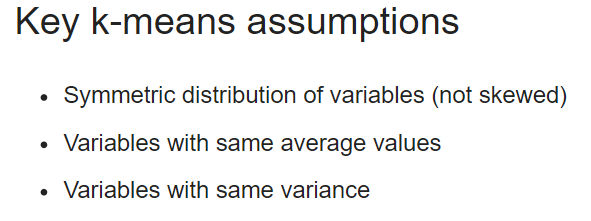

##  Skewed Variables 

### Identifying Skewness

In [244]:
import seaborn as sns
import matplotlib.pyplot as plt

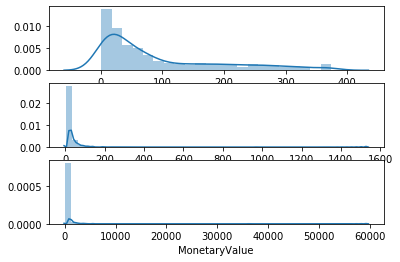

In [300]:
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(datamart['Recency'])

# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(datamart['Frequency'])

# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(datamart['MonetaryValue'])

# Show the plot
plt.show()

### Removing Skewness

<b> Removing Skewness of Variables ::</b>
- Logarithmic Transformation
<br> NOTE: Only works for positive values </b>
- Box-Cox Transformation

In [296]:
import numpy as np
frequency_log = np.log(datamart['Frequency'])

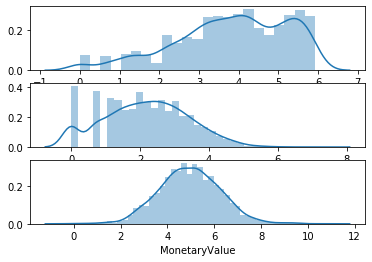

In [301]:
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(np.log(datamart['Recency']))

# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(np.log(datamart['Frequency']))

# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(np.log(datamart['MonetaryValue']))

# Show the plot
plt.show()

<p style="border-radius: 30px;
          border:2px; 
          border-style:solid; 
          border-color:#000000;
          padding: 2em;
          box-shadow: 5px 10px;
          text-align: justify;
          background-color:lightgreen;">
<b>Dealing with negative values</b>  <br>
    ** Add a constant to all values before log-transformation (abs value of lowest negative value) + small constant (eg: 1)<br>
    **  Cube Root Transformation

</p>

## Centering and scaling data


In [302]:
datamart[['Recency' ,'Frequency' ,'MonetaryValue']].describe()

,Recency,Frequency,MonetaryValue
count,3701.000000,3701.000000,3701.000000
mean,94.298568,19.147257,380.535069
std,99.974969,44.831615,1474.285937
min,1.000000,1.000000,0.650000
25%,19.000000,4.000000,59.400000
50%,52.000000,9.000000,140.300000
75%,151.000000,21.000000,337.800000
max,374.000000,1532.000000,59596.070000


In [305]:
datamart_rfm = datamart[['Recency' ,'Frequency' ,'MonetaryValue']]

In [307]:
datamart_rfm_centered = datamart_rfm - datamart_rfm.mean()

In [309]:
datamart_rfm_centered.describe().round(2)

,Recency,Frequency,MonetaryValue
count,3701.00,3701.00,3701.00
mean,0.00,0.00,0.00
std,99.97,44.83,1474.29
min,-93.30,-18.15,-379.89
25%,-75.30,-15.15,-321.14
50%,-42.30,-10.15,-240.24
75%,56.70,1.85,-42.74
max,279.70,1512.85,59215.53


In [310]:
datamart_scaled = datamart_rfm / datamart_rfm.std()

datamart_scaled.describe()

,Recency,Frequency,MonetaryValue
count,3701.000000,3701.000000,3701.000000
mean,0.943222,0.427093,0.258115
std,1.000000,1.000000,1.000000
min,0.010003,0.022306,0.000441
25%,0.190048,0.089223,0.040291
50%,0.520130,0.200751,0.095165
75%,1.510378,0.468419,0.229128
max,3.740936,34.172313,40.423685


<b> Combinig the two:: </b>

In [311]:
from sklearn.preprocessing import StandardScaler

In [312]:
scaler = StandardScaler()
scaler.fit(datamart_rfm)
datamart_normalized = scaler.transform(datamart_rfm)

C:\Users\Ashwin\Miniconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ashwin\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


## Pre-processing pipeline

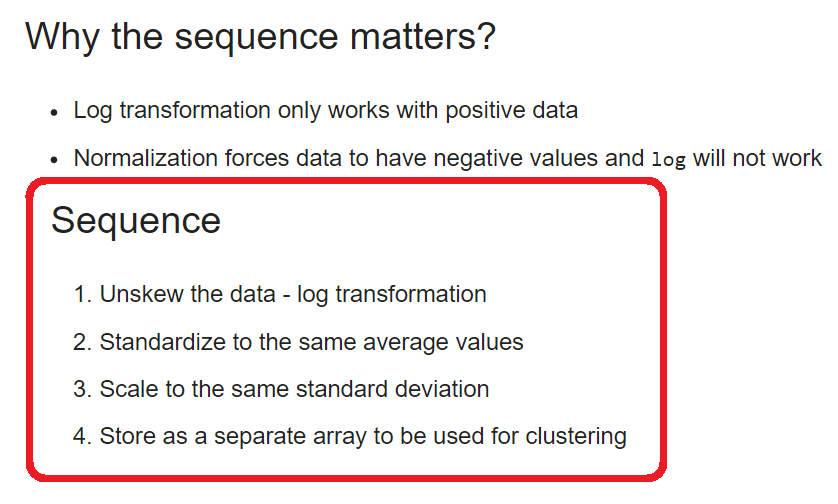

In [317]:
# Unskew the data
datamart_log = np.log(datamart_rfm)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(datamart_log)

# Scale and center the data
datamart_normalized = scaler.transform(datamart_log)

# Create a pandas DataFrame
datamart_normalized = pd.DataFrame(data=datamart_normalized, 
                                   index=datamart_rfm.index, 
                                   columns=datamart_rfm.columns)

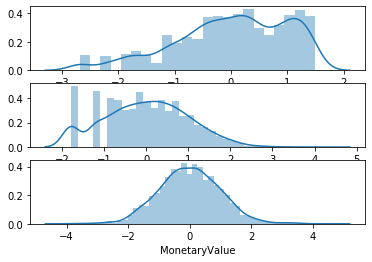

In [318]:
# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(datamart_normalized['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(datamart_normalized['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(datamart_normalized['MonetaryValue'])

# Show the plot
plt.show()

# K-Means Clustering

## Modeling

In [319]:
# Import KMeans 
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

In [320]:
# Create a DataFrame by adding a new cluster label column
datamart_rfm_k3 = datamart_rfm.assign(Cluster=cluster_labels)

In [322]:
datamart_rfm_k3.tail()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
18280,278,2,38.70,1
18281,181,2,31.80,1
18282,8,2,30.70,1
18283,4,152,432.93,2
18287,43,15,395.76,0


In [323]:
# Group the data by cluster
grouped = datamart_rfm_k3.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          78.4      13.6         232.0  1621
1         171.6       3.1          55.3  1225
2          13.8      52.7        1128.1   855

## Choosing Number of Clusters

In [324]:
sse = {}  #sum of squared errors

In [326]:
# Fit KMeans and calculate SSE for each k
for k in range(1, 21):
  
     # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(datamart_normalized)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_ 

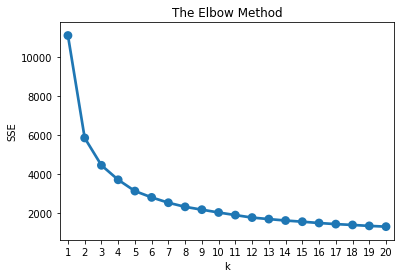

In [327]:
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

## Profile and interpret segments


### Snake Plot

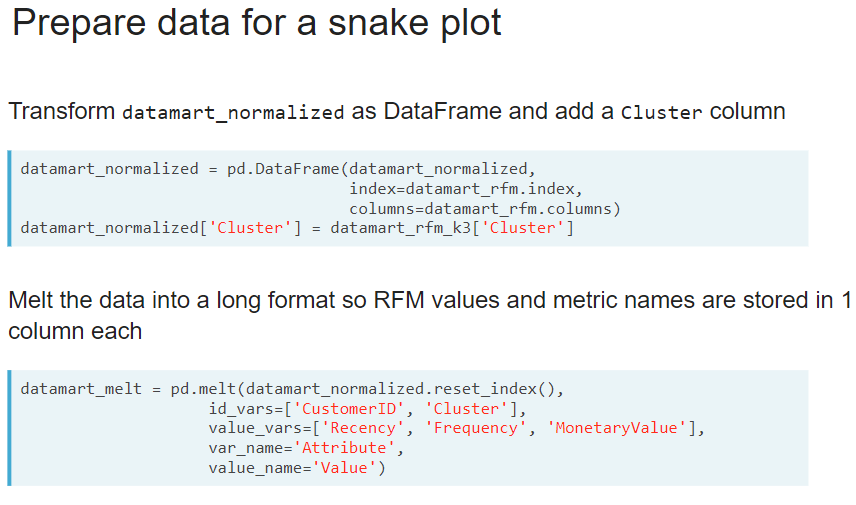

In [343]:
datamart_normalized = pd.DataFrame(datamart_normalized , 
                                  index = datamart_rfm.index,
                                  columns = datamart_rfm.columns)
datamart_normalized['Cluster'] = datamart_rfm_k3['Cluster']

In [344]:
datamart_normalized.head(2)

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12747,-2.195642,0.909521,1.482882,2
12748,-2.684553,3.845050,3.022433,2


In [345]:
# Melt the normalized dataset and reset the index
datamart_melt = pd.melt(
  					datamart_normalized.reset_index(), 
                        
# Assign CustomerID and Cluster as ID variables                  
                    id_vars=['CustomerID', 'Cluster'],

# Assign RFM values as value variables
                    value_vars=['Recency', 'Frequency', 'MonetaryValue'], 
                        
# Name the variable and value
                    var_name='Metric', value_name='Value'
					)

In [346]:
datamart_melt

,CustomerID,Cluster,Metric,Value
0,12747,2,Recency,-2.195642
1,12748,2,Recency,-2.684553
2,12749,2,Recency,-1.706731
3,12820,2,Recency,-1.909647
4,12822,0,Recency,0.322128
...,...,...,...,...
11098,18280,1,MonetaryValue,-0.983925
11099,18281,1,MonetaryValue,-1.133219
11100,18282,1,MonetaryValue,-1.159983
11101,18283,2,MonetaryValue,0.851890


-  This is a great looking visualization that you can use to name customer personas!

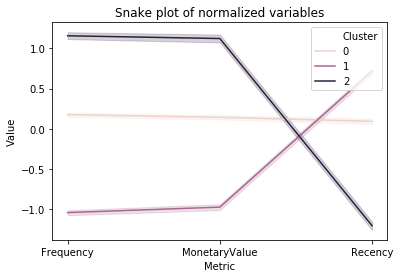

In [347]:
# Add the plot title
plt.title('Snake plot of normalized variables')
# Add the x axis label
plt.xlabel('Metric')
# Add the y axis label
plt.ylabel('Value')

# Plot a line for each value of the cluster variable
sns.lineplot(data=datamart_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

### Relative importance of each attribute compared to Population Average

In [336]:
# Calculate average RFM values for each cluster
cluster_avg = datamart_rfm_k3.groupby(['Cluster']).mean() 

In [337]:
# Calculate average RFM values for the total customer population
population_avg = datamart_rfm.mean()

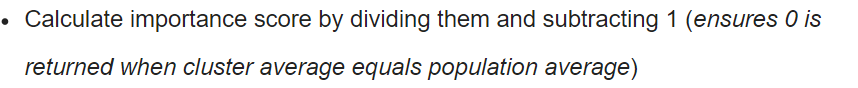

In [338]:
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1

In [339]:
relative_imp

,Recency,Frequency,MonetaryValue
Cluster,,,
0,-0.169091,-0.290863,-0.39022
1,0.819501,-0.837223,-0.85470
2,-0.853557,1.750978,1.96439


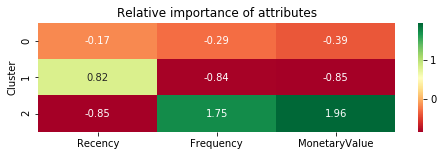

In [340]:
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(8, 2))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

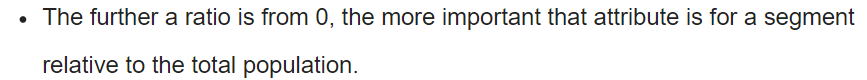

## End-to-end segmentation solution


Additioanl feature :::::TENURE : Time since first transaction(How long the customer has been with the company)

In [370]:
datamart.head()

,Recency,Frequency,MonetaryValue,Tenure
CustomerID,,,,
12747,2,27,992.82,369
12748,1,967,7522.06,370
12749,4,37,813.45,213
12820,3,17,268.02,327
12822,71,9,146.15,87


In [371]:
# Import StandardScaler 
from sklearn.preprocessing import StandardScaler

# Apply log transformation
datamart_rfmt_log = np.log(datamart)

# Initialize StandardScaler
scaler = StandardScaler(); scaler.fit(datamart_rfmt_log)

# Transform and store the scaled data as datamart_rfmt_normalized
datamart_rfmt_normalized = scaler.transform(datamart_rfmt_log)

In [373]:
sse={}

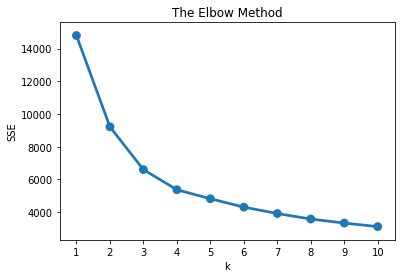

In [374]:
# Fit KMeans and calculate SSE for each k
for k in range(1, 11):
  
    # Initialize KMeans with k clusters and fit it 
    kmeans = KMeans(n_clusters=k, random_state=1).fit(datamart_rfmt_normalized)
    
    # Assign sum of squared distances to k element of the sse dictionary
    sse[k] = kmeans.inertia_ 

# Add the plot title, x and y axis labels
plt.title('The Elbow Method'); plt.xlabel('k'); plt.ylabel('SSE')

# Plot SSE values for each k stored as keys in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

- The elbow is visible around 3-4 clusters!

In [375]:
# Import KMeans 
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=4, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_rfmt_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

In [377]:
# Create a new DataFrame by adding a cluster label column to datamart_rfmt
datamart_rfmt_k4 = datamart.assign(Cluster=cluster_labels)

# Group by cluster
grouped = datamart_rfmt_k4.groupby(['Cluster'])

# Calculate average RFMT values and segment sizes for each cluster
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Tenure': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue Tenure      
           mean      mean          mean   mean count
Cluster                                             
0          88.7      16.1         291.1  261.4  1253
1          34.8       6.9         100.8   47.1   755
2         215.3       3.4          60.5  237.9   941
3          12.0      56.3        1210.9  293.8   752